In [4]:
from google.colab import files
uploaded = files.upload()



Saving IMDB Dataset.csv to IMDB Dataset.csv


In [96]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

df2.apply(lambda x: x.astype(str).str.lower())
df2.review=df2.review.str.lower()
print(df2.head())


df2.review.replace(regex=r'[^a-z0-9 ]', value='', inplace=True)
print ('Number of reviews :', len(df2))

from collections import Counter

all_text2 = ' '.join(df2.review)
words = all_text2.split()
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

print(count_words)



                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive
Number of reviews : 50000
Counter({'the': 663830, 'and': 320636, 'a': 320521, 'of': 288380, 'to': 266773, 'is': 210156, 'in': 184861, 'it': 152891, 'i': 152088, 'this': 149400, 'that': 136090, 'br': 113709, 'was': 95221, 'as': 91231, 'with': 86843, 'for': 86723, 'movie': 83507, 'but': 81747, 'film': 74450, 'on': 66670, 'not': 59859, 'you': 59554, 'are': 58175, 'his': 57279, 'have': 55052, 'be': 52738, 'he': 51940, 'one': 51022, 'its': 49113, 'at': 46503, 'all': 45246, 'by': 44141, 'an': 42821, 'they': 41532, 'from': 40287, 'who': 40178, 'so': 39510, 'like': 38987, 'or': 34944, 'just': 34864, 'her': 34243, 'about': 

In [97]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

reviews_int = []
for review in df2.review:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

encoded_labels = [1 if label =='positive' else 0 for label in df2.sentiment]
encoded_labels = np.array(encoded_labels)




[[28, 4, 1, 77, 1940, 44, 1062, 11, 100, 145, 40, 477, 3315, 393, 460, 26, 3190, 34, 23, 205, 14, 10, 6, 600, 48, 589, 15, 2127, 12, 1, 87, 146, 11, 3254, 69, 42, 3315, 13, 29, 5599, 2, 15376, 134, 4, 581, 61, 282, 7, 205, 35, 1, 669, 138, 1706, 69, 10, 6, 21, 3, 118, 16, 1, 8328, 5794, 39, 11862, 10, 118, 2507, 55, 6066, 15, 5634, 5, 1469, 382, 39, 581, 29, 6, 3407, 7, 1, 352, 339, 4, 1, 23500, 12, 8, 6, 469, 3315, 14, 11, 6, 1, 11514, 338, 5, 1, 16024, 6869, 2544, 1060, 61601, 8, 2636, 1374, 20, 25362, 535, 33, 4727, 2520, 4, 1, 1207, 112, 31, 1, 7152, 25, 2992, 13011, 2, 408, 61602, 37, 17526, 6, 21, 319, 20, 1, 5097, 3721, 535, 6, 344, 5, 81655, 8467, 41095, 15377, 5169, 7893, 2461, 2, 18399, 61603, 329, 9263, 7471, 13442, 2, 8720, 34923, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 667, 5, 1, 187, 11, 8, 262, 112, 77, 257, 547, 2999, 818, 178, 1270, 4349, 16, 2501, 1095, 818, 1411, 818, 81656, 147, 977, 181, 1, 87, 393, 9, 120, 202, 3254, 69, 14, 37, 1573, 8, 13

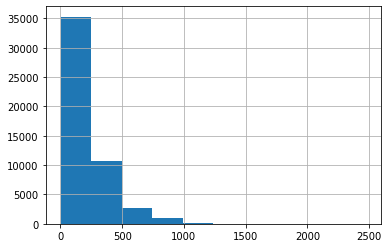

count    50000.000000
mean       230.193580
std        170.561742
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()


In [99]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]
seq_length=230
len(reviews_int)

features = np.zeros((len(reviews_int), seq_length), dtype = int)

for i, review in enumerate(reviews_int):
    review_len = len(review)
    
    if review_len <= seq_length:
        zeroes = list(np.zeros(seq_length-review_len))
        new = zeroes+review       
    elif review_len > seq_length:
        new = review[0:seq_length]

    features[i,:] = np.array(new)

print (features[:10,:])





[[   28     4     1 ...  1462     3  1249]
 [    0     0     0 ...  1900    73   223]
 [    0     0     0 ...    64    15   333]
 ...
 [    0     0     0 ...    20     1   945]
 [    0     0     0 ... 10151 45572    60]
 [    0     0     0 ...    12    79  1214]]


In [100]:
len_feat=len(features)

split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]


5000


In [101]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(torch.from_numpy(np.asarray(train_x)), torch.from_numpy(np.asarray(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.asarray(valid_x)), torch.from_numpy(np.asarray(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.asarray(test_x)), torch.from_numpy(np.asarray(test_y)))


batch_size = 50


train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()


Sample input size:  torch.Size([50, 230])
Sample input: 
 tensor([[    0,     0,     0,  ...,    10,  2449,  3080],
        [    0,     0,     0,  ...,    19, 12083,  1065],
        [    0,     0,     0,  ...,   412,    10,    28],
        ...,
        [  790,   145,     3,  ...,    96,   710,    25],
        [  420,     9,   422,  ...,  2077,    82,   267],
        [    0,     0,     0,  ...,     4,  1247,  1571]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1])


In [102]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
   

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
       
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        
        self.dropout = nn.Dropout(0.3)
        
        
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        
        batch_size = x.size(0)


        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
    
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        
        sig_out = self.sig(out)
        
        
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] 
        
        
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [103]:
vocab_size = len(vocab_to_int)+1 
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)




SentimentLSTM(
  (embedding): Embedding(180801, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [108]:

lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)



epochs = 4 

counter = 0
print_every = 100
clip=5 


net.train()
for e in range(epochs):
    h = net.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        counter += 1
        
        h = tuple([each.data for each in h])
        net.zero_grad()
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.606356... Val Loss: 0.620995
Epoch: 1/4... Step: 200... Loss: 0.723336... Val Loss: 0.620560
Epoch: 1/4... Step: 300... Loss: 0.674463... Val Loss: 0.672508
Epoch: 1/4... Step: 400... Loss: 0.675506... Val Loss: 0.659471
Epoch: 1/4... Step: 500... Loss: 0.564510... Val Loss: 0.595275
Epoch: 1/4... Step: 600... Loss: 0.590278... Val Loss: 0.461451
Epoch: 1/4... Step: 700... Loss: 0.308542... Val Loss: 0.407218
Epoch: 1/4... Step: 800... Loss: 0.461925... Val Loss: 0.405760
Epoch: 2/4... Step: 900... Loss: 0.409922... Val Loss: 0.365811
Epoch: 2/4... Step: 1000... Loss: 0.380004... Val Loss: 0.356871
Epoch: 2/4... Step: 1100... Loss: 0.323679... Val Loss: 0.348569
Epoch: 2/4... Step: 1200... Loss: 0.284942... Val Loss: 0.352523
Epoch: 2/4... Step: 1300... Loss: 0.419715... Val Loss: 0.323772
Epoch: 2/4... Step: 1400... Loss: 0.175823... Val Loss: 0.323348
Epoch: 2/4... Step: 1500... Loss: 0.351353... Val Loss: 0.335669
Epoch: 2/4... Step: 1600... Loss: 

In [120]:
test_losses = [] # track loss
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()
for inputs, labels in test_loader:

    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    pred = torch.round(output.squeeze())
    
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    num_correct += np.sum(correct)


print("Test loss: {:.3f}".format(np.mean(test_losses)))

test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.409
Test accuracy: 0.866


In [121]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower()
    test_text = ''.join([c for c in test_review if c not in punctuation])
    test_words = test_text.split()

    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints




def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    test_ints = tokenize_review(test_review)
    
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    output, h = net(feature_tensor, h)
    pred = torch.round(output.squeeze()) 
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

In [119]:
test_review = 'This movie had fine acting and the dialogue was really fine. I loved it.'
seq_length=200 # good to use the length that was trained on
predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.984280
Positive review detected!
